## Quasi Monte Carlo 


## European call Option 

Suppose we want to price an option with the initial asset price: $$S_{0}=100$$
strike price: $$K=100$$
risk free rate: $$ r=0.02$$
volatility: $$ \sigma =0.25$$
and maturity: $$T=1$$
year. Risk-neutral pricing process is as follows:
$$ S_{T} = S_{0} \times \exp((r-\sigma^2/2 )T +\sigma Z\sqrt{T})$$
where $Z$ denotes the Brownian Motion which follows the normal distribution with $Z \sim N(0,1)$

## Halton Sequence dimension is the Van Der Corput sequence

We generate Halton sequence of prime numbers $n=10^3$ with  that follow the Normal Distribution for mimicing the Brownian Motion in European call Option:



In [1]:
import chaospy
distribution = chaospy.J(chaospy.Normal(0, 1),chaospy.Normal(0, 1))
samples = distribution.sample(1000,rule="halton")[0]

## Next we test the normality of this sequence

$$H_{O}: p_{1},p_{2},\dots,p_{D} \sim N(0.1)$$
$$H_{1}: p_{1},p_{2},\dots,p_{D} \nsim N(0.1)$$

In [2]:
from scipy import stats
kolmogorov_test = stats.kstest(samples, 'norm',alternative='two-sided')
print(kolmogorov_test)
shapiro_test = stats.shapiro(samples)
print(shapiro_test)

KstestResult(statistic=0.0024531250000000004, pvalue=1.0)
ShapiroResult(statistic=0.9994845986366272, pvalue=0.9973069429397583)


In [3]:
from scipy import stats
p = shapiro_test.pvalue
alpha = 0.05

if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis can be rejected")
else:
     print("The null hypothesis cannot be rejected")




The null hypothesis cannot be rejected


(array([0.00835715, 0.00835715, 0.00835715, 0.00835715, 0.01671429,
        0.01671429, 0.03342858, 0.03342858, 0.05014287, 0.05850002,
        0.07521431, 0.0919286 , 0.10864289, 0.13371433, 0.15878577,
        0.19221435, 0.20892864, 0.24235722, 0.26742866, 0.30085724,
        0.31757153, 0.34264297, 0.37607155, 0.3844287 , 0.39278585,
        0.3844287 , 0.40950014, 0.39278585, 0.37607155, 0.36771441,
        0.34264297, 0.30921439, 0.30085724, 0.25907151, 0.24235722,
        0.2005715 , 0.1838572 , 0.15042862, 0.12535718, 0.10864289,
        0.08357146, 0.06685717, 0.05850002, 0.04178573, 0.03342858,
        0.02507144, 0.02507144, 0.00835715, 0.01671429, 0.00835715]),
 array([-3.09726908, -2.977611  , -2.85795292, -2.73829484, -2.61863676,
        -2.49897868, -2.3793206 , -2.25966252, -2.14000444, -2.02034636,
        -1.90068828, -1.7810302 , -1.66137212, -1.54171404, -1.42205596,
        -1.30239788, -1.1827398 , -1.06308172, -0.94342364, -0.82376556,
        -0.70410748, -0.58

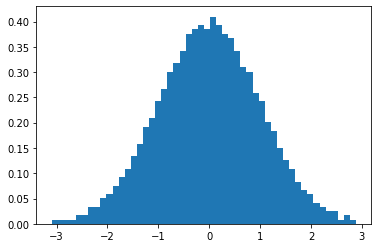

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
plt.hist(samples,bins=50,density=1)

In [5]:
def Callqsim(S0, K, r, Ti, sigma,M):
    distribution = chaospy.J(chaospy.Normal(0, 1),chaospy.Normal(0, 1))
    samples = np.array(distribution.sample(M,rule="halton"))[0]
    ri      = (r-0.5*sigma**2)*Ti
    sd      = sigma*np.sqrt(Ti)
    price   = S0*np.exp(ri+sd*samples)
    call    = np.maximum(price - K,0)
    Pcall   = call*(np.exp(-ri*Ti))
    pricem  = np.mean(Pcall)
    rmse    = np.var(Pcall)/M
    rate    = 1/np.sqrt(M)
    return(pricem,rmse,rate)


S0 = 100     
K  = 70        
r  = 0.02       
Ti = 1/4       
sigma = 0.02 
M = 1000
Callqsim(S0,K,r,Ti,sigma,M)

(30.458834814256683, 0.0009927051643259732, 0.03162277660168379)

In [6]:
np.random.seed(6969)
qmc_simul = Callqsim(S0,K,r,Ti,sigma,M)
qmc_simul = np.asmatrix(qmc_simul)
qmc_simul

matrix([[3.04588348e+01, 9.92705164e-04, 3.16227766e-02]])

In [7]:
N=100
items = np.arange(2,1000,1)
qmc_simul1 = []
for i in items:
    qmc_simul1.append(Callqsim(S0,K,r,Ti,sigma,N*i))
qmc_simul1 = np.asmatrix(qmc_simul1)
qmc_simul1

matrix([[3.04421066e+01, 4.86436787e-03, 7.07106781e-02],
        [3.04510494e+01, 3.28329897e-03, 5.77350269e-02],
        [3.04503784e+01, 2.47325426e-03, 5.00000000e-02],
        ...,
        [3.04634056e+01, 1.01044048e-05, 3.16703178e-03],
        [3.04634024e+01, 1.00941281e-05, 3.16544469e-03],
        [3.04634252e+01, 1.00844990e-05, 3.16385999e-03]])

In [8]:
qmc = np.concatenate((qmc_simul,qmc_simul1))
qmc

matrix([[3.04588348e+01, 9.92705164e-04, 3.16227766e-02],
        [3.04421066e+01, 4.86436787e-03, 7.07106781e-02],
        [3.04510494e+01, 3.28329897e-03, 5.77350269e-02],
        ...,
        [3.04634056e+01, 1.01044048e-05, 3.16703178e-03],
        [3.04634024e+01, 1.00941281e-05, 3.16544469e-03],
        [3.04634252e+01, 1.00844990e-05, 3.16385999e-03]])

## Value plot

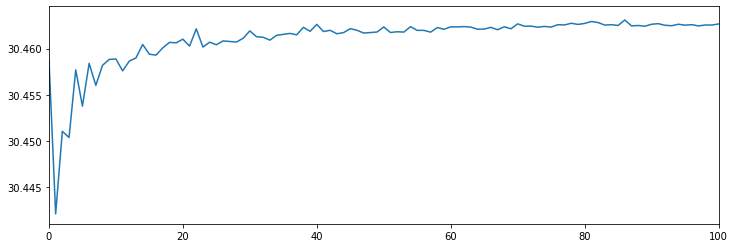

In [9]:
plt.figure(figsize=(12,4))
plt.xlim(0,(N))

plt.plot((qmc[:,0]))

## convergence rate plot 

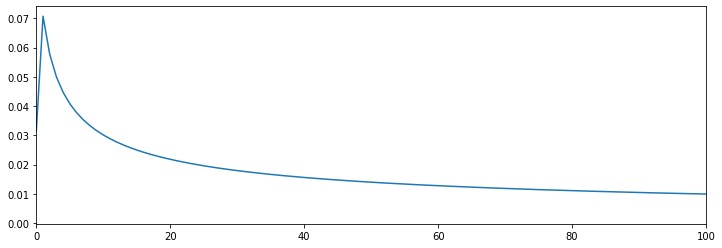

In [10]:
plt.figure(figsize=(12,4))
plt.xlim(0,(N))

plt.plot((qmc[:,2]))